In [2]:
pip install geopandas as pygis

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

c:\Users\AKHTAR HUSSAIN\anaconda3\Lib\site-packages\pandas\core\computation\expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.8.4' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


cerating geodataFrame

In [4]:
#creating a geodataFrame from coordinate data
# Creating a GeoDataFrame from coordinate data
data = {
    "City": ["Tokyo", "New York", "London", "Paris"],
    "Latitude": [35.6895, 40.7128, 51.5074, 48.8566],
    "Longitude": [139.6917, -74.0060, -0.1278, 2.3522]
}

# First create regular DataFrame
df = pd.DataFrame(data)

# Convert to GeoDataFrame by creating point geometry from coordinates
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

print(gdf)

       City  Latitude  Longitude                  geometry
0     Tokyo   35.6895   139.6917  POINT (139.6917 35.6895)
1  New York   40.7128   -74.0060   POINT (-74.006 40.7128)
2    London   51.5074    -0.1278   POINT (-0.1278 51.5074)
3     Paris   48.8566     2.3522    POINT (2.3522 48.8566)


In [5]:
url ="https://github.com/opengeos/datasets/releases/download/vector/nybb.geojson"
gdf = gpd.read_file(url)
gdf.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [6]:
output_file = "nyc_boroughs.geojson"
gdf.to_file(output_file,driver = "GeoJSON")
print("GeodaFrame has been written to {output_file}")

GeodaFrame has been written to {output_file}


In [7]:
import os

# List all files in current directory
files = os.listdir('.')
print("Files in current directory:", files)

# Or check if your specific file exists
if os.path.exists(output_file):
    print(f"File found at: {os.path.abspath(output_file)}")

Files in current directory: ['.ipynb_checkpoints', 'Interactive map.ipynb', 'intro-gispro-main (1)', 'map.html', 'nyc_boroughs.geojson', 'nyc_boroughs.shp']
File found at: c:\Users\AKHTAR HUSSAIN\Desktop\GIS & GEE\python_foundation\python_gis\nyc_boroughs.geojson


In [8]:
#save as shp file 
output_file = "nyc_boroughs.shp"
gdf.to_file(output_file,driver="GPKG")

c:\Users\AKHTAR HUSSAIN\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: File nyc_boroughs.shp has GPKG application_id, but non conformant file extension
  ogr_write(


In [9]:
print(f"Current CRS:{gdf.crs}")

Current CRS:EPSG:2263


In [10]:
#Reprojection to WGS84(latitude/longitide) for global compatibilty
gdf_4326 = gdf.to_crs(epsg=4326)
print(f"Reprojected CRS:{gdf_4326.crs}")
gdf_4326.head()

Reprojected CRS:EPSG:4326


,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


In [11]:
#Reooroject  to web mercator for accurate area calculation  in Sqm
gdf = gdf.to_crs("EPSG:3857")
#set BoroName as index for easier data access
gdf = gdf.set_index("BoroName")
print(f"Now using CRS:{gdf.crs}")

Now using CRS:EPSG:3857


In [12]:
#claculate area  in sqm
gdf["area"]=gdf.area
#convert to more readable units(Sqm)
gdf["area_km2"] = gdf["area"]/1000000
#display result sorted by area
gdf[["area","area_km2"]].sort_values("area_km2",ascending=False)

,area,area_km2
BoroName,,
Queens,4.928316e+08,492.831621
Brooklyn,3.129694e+08,312.969358
Staten Island,2.618035e+08,261.803516
Bronx,1.929251e+08,192.925108
Manhattan,1.032201e+08,103.220100


In [13]:
#extract boundy lines from polygons
gdf["boundry"] = gdf.boundary
#calculate centroid(geometric center)
gdf["centroid"] = gdf.centroid
#display the geometric feature
gdf[["boundry","centroid"]].head()

,boundry,centroid
BoroName,,
Staten Island,"MULTILINESTRING ((-8243264.851 4948597.836, -8...",POINT (-8254713.541 4950718.061)
Queens,"MULTILINESTRING ((-8219461.925 4952778.732, -8...",POINT (-8217436.751 4969318.726)
Brooklyn,"MULTILINESTRING ((-8222843.672 4950893.793, -8...",POINT (-8231817.467 4960085.273)
Manhattan,"MULTILINESTRING ((-8238858.864 4965915.024, -8...",POINT (-8233984.803 4979551.765)
Bronx,"MULTILINESTRING ((-8226155.13 4982269.949, -82...",POINT (-8222783.631 4990631.242)


In [14]:
#Distance Calculation
#Use manhattan's centroid as  the refrence point
manhattan_centroid= gdf.loc["Manhattan","centroid"]
#Calculate distance from each borough centroid to manhattan
gdf["distance_to_manhattan"] = gdf["centroid"].distance(manhattan_centroid)
#convert to kilometers and display results
gdf["distance_to_manhattan_km"] = gdf["distance_to_manhattan"]/1000
gdf[["distance_to_manhattan_km"]].sort_values("distance_to_manhattan_km")

,distance_to_manhattan_km
BoroName,
Manhattan,0.000000
Bronx,15.755034
Queens,19.456442
Brooklyn,19.586772
Staten Island,35.511450


In [15]:
#claculate summary statistics
mean_distance = gdf["distance_to_manhattan_km"].mean()
max_distance = gdf["distance_to_manhattan_km"].max()
total_area = gdf["area_km2"].sum()

In [16]:
print(f"Mean distance to Manhattan:{mean_distance:.2f}km")
print(f"Maximum distance to Manhattan:{max_distance:.2f}km")
print(f"Total NYC area:{total_area:.2f}km2")

Mean distance to Manhattan:18.06km
Maximum distance to Manhattan:35.51km
Total NYC area:1363.75km2


In [17]:
#setting up plotting environment
import matplotlib.pyplot as plt 
#set high resolution for better quality plot
plt.rcParams["figure.dpi"] =150

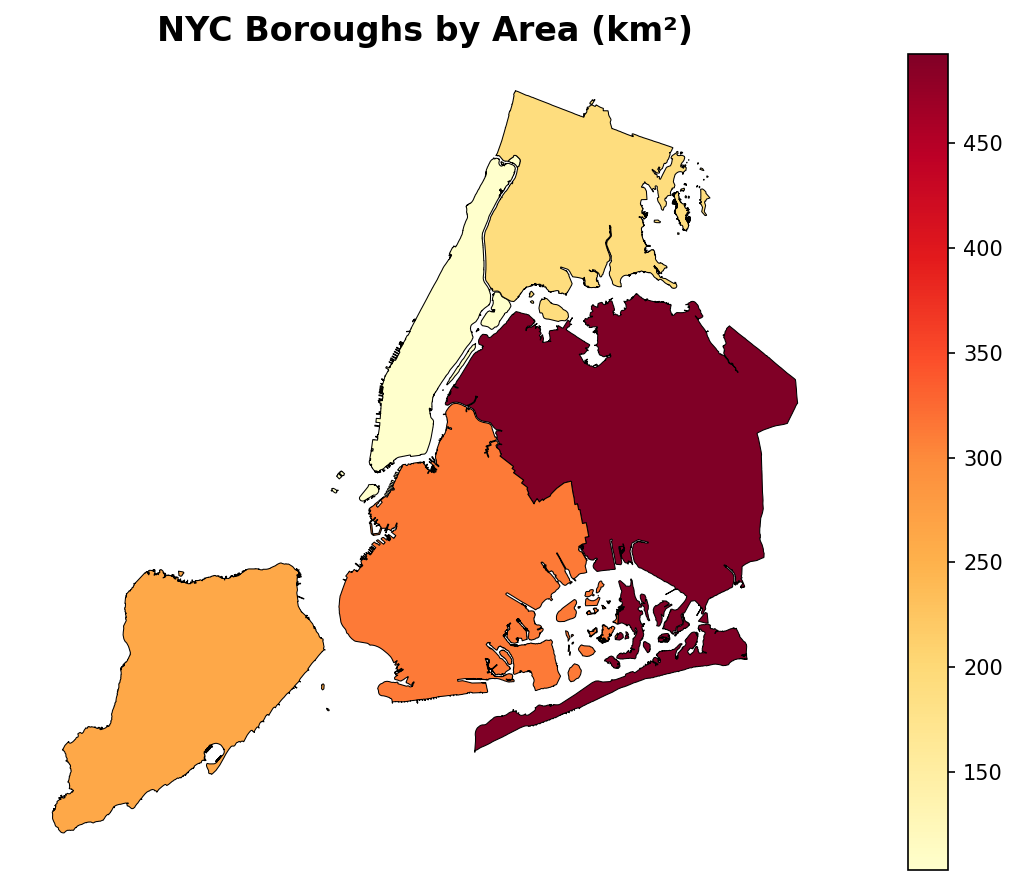

In [18]:
# Create choropleth map showing borough area
fig, ax = plt.subplots(figsize=(10, 6))

gdf.plot(
    column="area_km2",
    ax=ax,
    legend=True,
    cmap="YlOrRd",
    edgecolor="black",
    linewidth=0.5
)

plt.title("NYC Boroughs by Area (km²)", fontsize=16, fontweight="bold")
plt.axis("off")
plt.tight_layout()
plt.show()

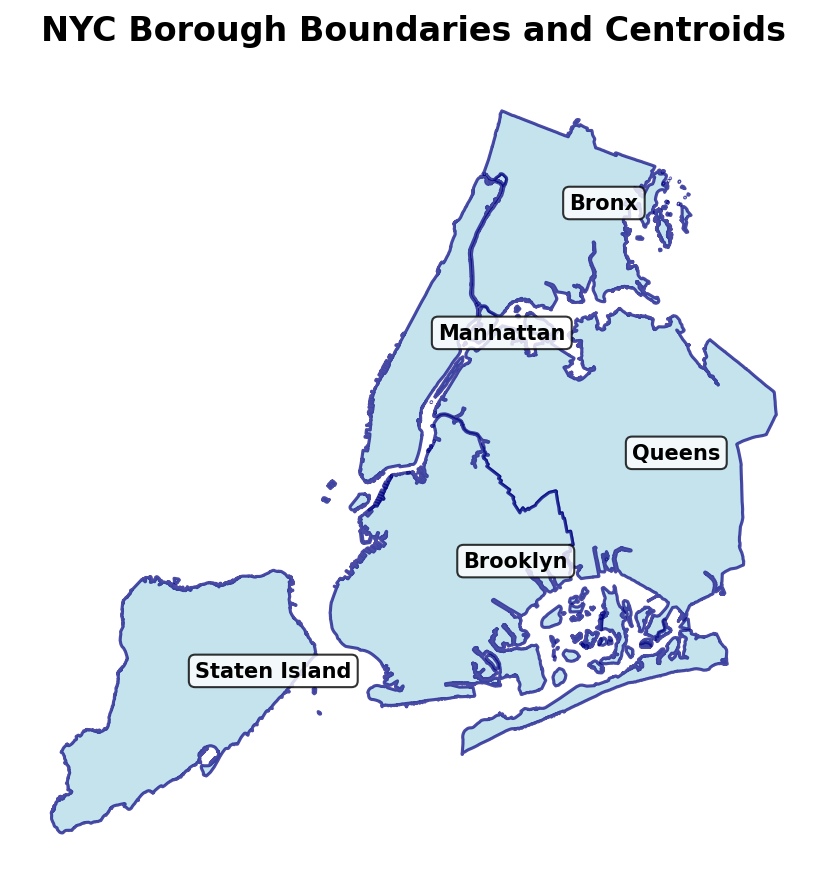

In [19]:
# Create a comprehensive map with multiple layers
fig, ax = plt.subplots(figsize=(10, 6))

# Plot borough boundaries as base layer
gdf["geometry"].plot(
    ax=ax, color="lightblue", edgecolor="navy", linewidth=1.5, alpha=0.7
)

# Add centroid as point layer
for idx, row in gdf.iterrows():
    # Get centroid coordinates for label placement
    x = row.centroid.x
    y = row.centroid.y
    ax.annotate(
        idx,
        xy=(x, y),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=10,
        fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8)
    )

plt.title("NYC Borough Boundaries and Centroids", fontsize=16, fontweight="bold")
plt.axis("off")
plt.tight_layout()
plt.show()

In [20]:
!pip install folium matplotlib mapclassify

In [21]:
!pip install "numpy<2"

In [22]:
!pip uninstall numpy scipy mapclassify geopandas -y

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: scipy 1.11.4
Uninstalling scipy-1.11.4:
  Successfully uninstalled scipy-1.11.4
Found existing installation: mapclassify 2.8.1
Uninstalling mapclassify-2.8.1:
  Successfully uninstalled mapclassify-2.8.1
Found existing installation: geopandas 1.1.2
Uninstalling geopandas-1.1.2:
  Successfully uninstalled geopandas-1.1.2


You can safely remove it manually.
You can safely remove it manually.


In [23]:
!pip install numpy==1.26.4 scipy==1.11.4 geopandas mapclassify folium matplotlib

  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached scipy-1.11.4-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached geopandas-1.1.2-py3-none-any.whl.metadata (2.3 kB)
  Using cached mapclassify-2.10.0-py3-none-any.whl.metadata (3.1 kB)
INFO: pip is looking at multiple versions of mapclassify to determine which version is compatible with other requirements. This could take a while.
  Using cached mapclassify-2.9.0-py3-none-any.whl.metadata (3.1 kB)
  Using cached mapclassify-2.8.1-py3-none-any.whl.metadata (2.8 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
Using cached scipy-1.11.4-cp311-cp311-win_amd64.whl (44.1 MB)
Using cached geopandas-1.1.2-py3-none-any.whl (341 kB)
Using cached mapclassify-2.8.1-py3-none-any.whl (59 kB)

   ---------------------------------------- 0/4 [numpy]
   ---------------------------------------- 0/4 [numpy]
   ---------------------------------------- 0/4 [numpy]
   --------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
transformers 2.1.1 requires sentencepiece, which is not installed.
bqplot 0.12.45 requires pandas<3.0.0,>=1.0.0, but you have pandas 3.0.0 which is incompatible.
numba 0.57.0 requires numpy<1.25,>=1.21, but you have numpy 1.26.4 which is incompatible.


In [24]:
import numpy as np
import scipy
import geopandas as gpd

print(f"NumPy version: {np.__version__}")
print(f"SciPy version: {scipy.__version__}")
print(f"GeoPandas version: {gpd.__version__}")

NumPy version: 1.26.4
SciPy version: 1.11.4
GeoPandas version: 1.1.2


In [25]:
# Save the map to HTML file to verify it works
m = gdf.explore(
    column="area_km2",
    cmap="YlOrRd",
    tooltip=["area_km2", "distance_to_manhattan_km"],
    popup=True,
    legend=True,
)

# Save to file
m.save('map.html')

# Display in notebook
m

Advance Geometric Operation
Buffer Analysis

In [26]:
#Create 3-km buffer around each borough
buffer_distance = 3000  #meter
gdf["buffered"] = gdf.buffer(buffer_distance)
print(f"created{buffer_distance/1000}km buffer zones around each borough")

created3.0km buffer zones around each borough


C:\Users\AKHTAR HUSSAIN\AppData\Local\Temp\ipykernel_13432\2393029443.py:22: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc="upper right")
C:\Users\AKHTAR HUSSAIN\AppData\Local\Temp\ipykernel_13432\2393029443.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right")


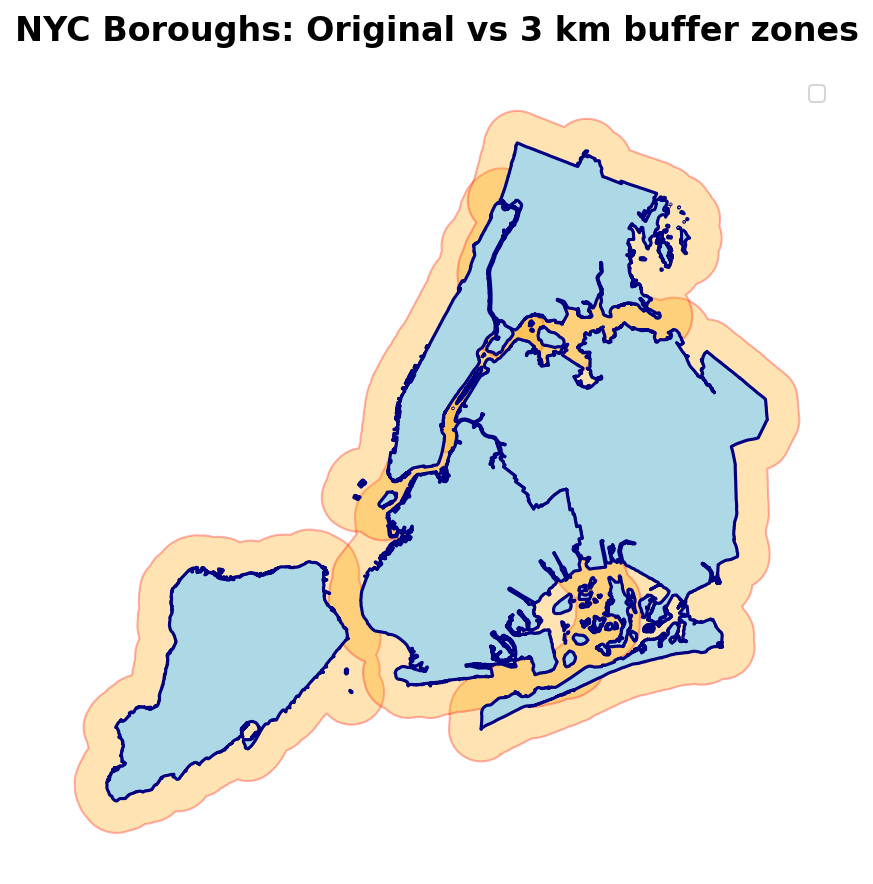

In [ ]:
ax = ax,
    color = "lightblue",
    edgecolor = "navy",
    linewidth=1.5,
    label="Original Boundries",#vizualise original vs buffered geometries
fig, ax = plt.subplots(figsize=(10,6))
#plot buffered area first(background)
gdf["buffered"].plot(
    ax = ax,
    alpha =0.3,
    color = "orange",
    edgecolor = "red",
    linewidth=1,
    label="3 km buffer zone",
)

#plot original geometries on top
gdf["geometry"].plot(
    
)
plt.title("NYC Boroughs: Original vs 3 km buffer zones",fontsize=16, fontweight= "bold")
plt.legend(loc="upper right")
plt.axis("off")
plt.tight_layout()
plt.show()

Convex hull analysis

In [30]:
gdf["convex_hull"] = gdf.convex_hull

#compare area between original shape  and convex hull
gdf["convex_hull_area"] = gdf["convex_hull"].area/1000000   #convert to km
gdf["area_ratio"] = gdf["convex_hull_area"]/gdf["area_km2"]
print("convex Hull Analysis:")
print(gdf[["area_km2", "convex_hull_area","area_ratio"]].round(2))

convex Hull Analysis:
               area_km2  convex_hull_area  area_ratio
BoroName                                             
Staten Island    261.80            332.54        1.27
Queens           492.83            845.79        1.72
Brooklyn         312.97            405.32        1.30
Manhattan        103.22            178.16        1.73
Bronx            192.93            269.55        1.40


Visualize the relationship between original shapes and their convex hulls

C:\Users\AKHTAR HUSSAIN\AppData\Local\Temp\ipykernel_13432\666132095.py:25: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc="upper right")
C:\Users\AKHTAR HUSSAIN\AppData\Local\Temp\ipykernel_13432\666132095.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right")


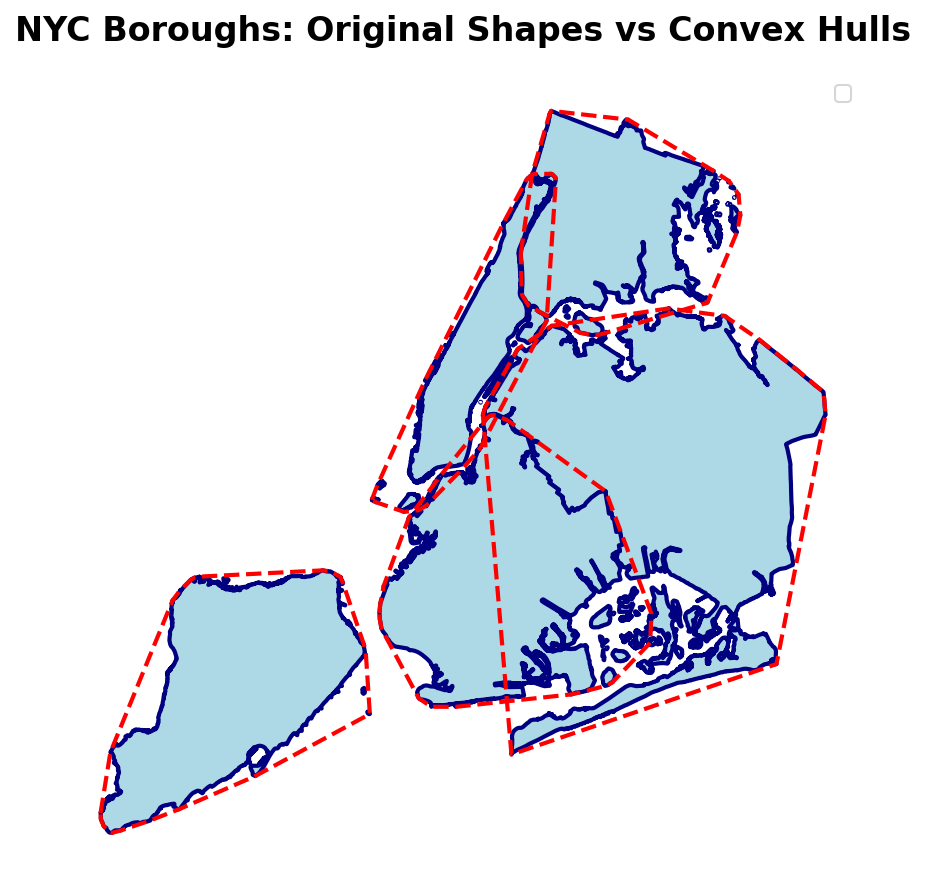

In [31]:
#creating comparison visualization
fig, ax = plt.subplots(figsize=(10,6))
#plot original geometry
gdf["geometry"].plot(
    ax = ax,
    color = "lightblue",
    edgecolor = "navy",
    linewidth=2,
    label="Original Shape"
)

#plot convex hull as outlines
gdf["convex_hull"].plot(
    ax = ax,
    facecolor="none",
edgecolor="red",
linewidth=2,
linestyle="--",
label="Convex Hull",
)
plt.title(
"NYC Boroughs: Original Shapes vs Convex Hulls", fontsize=16,
fontweight="bold"
)
plt.legend(loc="upper right")
plt.axis("off")
plt.tight_layout()
plt.show()

Intersection Analysis

In [32]:
# Test which buffered boroughs intersect with Manhattan's original boundary
manhattan_geom = gdf.loc["Manhattan", "geometry"]
gdf["intersects_manhattan"] = gdf["buffered"].intersects(manhattan_geom)
gdf["touches_manhattan"] = gdf["geometry"].touches(manhattan_geom)
# Display results
intersection_results = gdf[["intersects_manhattan", "touches_manhattan"]]
intersection_results

,intersects_manhattan,touches_manhattan
BoroName,,
Staten Island,False,False
Queens,True,True
Brooklyn,True,True
Manhattan,True,False
Bronx,True,True


Containment and Spatial Validation

In [35]:
# Verify that centroids fall within their respective borough boundaries
gdf["centroid_within_borough"] = gdf["centroid"].within(gdf["geometry"])
# Check for any anomalies
anomalies = gdf[~gdf["centroid_within_borough"]]
if len(anomalies) > 0:
    print("Warning: Some centroids fall outside their borough boundaries")
    print(anomalies.index.tolist())
else:
    print("✓ All centroids correctly fall within their borough boundaries")

✓ All centroids correctly fall within their borough boundaries
